# Lession 16 - Early Stopping MNIST

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
MNIST = np.load('../data/MNIST_train_1000.npz')
images = MNIST['train_images']
labels = MNIST['train_labels']
print(images.shape)
print(labels.shape)

(1000, 28, 28)
(1000,)


(b) Establish baseline accuracy rate.

In [8]:
tally = pd.Series(labels).value_counts()
acc_baseline = tally.max()/tally.sum()
print('baseline accuracy rate is ', acc_baseline)

baseline accuracy rate is  0.505


In [11]:
X = images.reshape(1000, 28*28)
P = pd.get_dummies(pd.DataFrame(labels, columns=['digit'], dtype='category')).values

In [21]:
epochs = 1000
model = Sequential()
model.add(Dense(2, input_shape=(28*28,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0)
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

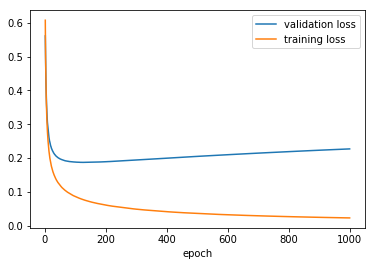

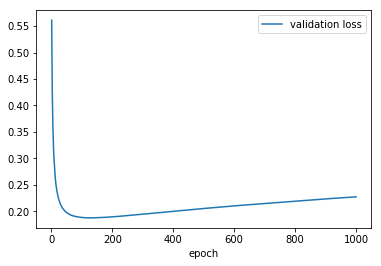

In [22]:
ax = results.plot.line(x='epoch', y='validation loss')
results.plot.line(x='epoch', y='training loss', ax=ax)
results.plot.line(x='epoch', y='validation loss')

It's getting worse the more you train.  Use Early Stopping.\Patience tells how many steps in the wrong direction
to go before quitting.

In [37]:
epochs = 1000
model = Sequential()
model.add(Dense(2, input_shape=(28*28,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0,
                 callbacks=[EarlyStopping(patience=0)])
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

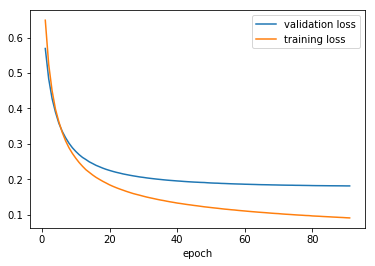

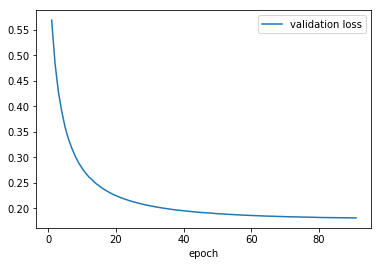

In [38]:
ax = results.plot.line(x='epoch', y='validation loss')
results.plot.line(x='epoch', y='training loss', ax=ax)
results.plot.line(x='epoch', y='validation loss')

In [39]:
epochs = 100
model = Sequential()
model.add(Dense(32, input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dense(16)
model.add(Activation('relu'))
model.add(Dense(8)
model.add(Activation('relu'))
model.add(Dense(4)
model.add(Activation('relu'))
model.add(Dense(2)
model.add(Activation('relu'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X, P, epochs=epochs, validation_split=0.2, verbose=0,
                 callbacks=[EarlyStopping(patience=0)])
results = pd.DataFrame()
results['epoch'] =    hist.epoch
results['epoch'] += 1
results['training loss'] = hist.history['loss']
results['validation loss'] = hist.history['val_loss']
results['training acc'] = hist.history['acc']
results['validation acc'] = hist.history['val_acc']

SyntaxError: invalid syntax (<ipython-input-39-24411170c16c>, line 6)

(e) Design a "deep" network of multiple dense layers